In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from Shapley import ShapNN
from DShap import DShap
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's have a calssification problem and use the a losigitic regression model for a small data set of size 100.

In [3]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

## Create Synthetic Dataset

Let's create a synthetic data set with input-output $y = Bernouli(f(x))$ where $f$ is a polynomial of oder 'difficulty' and $x \in \mathscr{R}^d$. ('important_dims' determines the number of $d$ dimensions in $x$ that are non-null)

In [4]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc>target_accuracy:
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.73


## Running

Now let's create the instance that takes cares of computing all the algorithms for the data set. Here we run it several times one-after-another, but in a real-world scenario they could be run in parallel. 

In [7]:
X, y = X_raw[:train_size], y_raw[:train_size]
X_test, y_test = X_raw[train_size:], y_raw[train_size:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'

sources = None

dshap = DShap(X, y, X_test, y_test, num_test, sources=sources, model_family=model, metric='accuracy',
              directory=directory, seed=0)
dshap.run(100, 0.1)

Starting LOO score calculations!
LOO values calculated!
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 G-Shapley i

In [19]:
X.tolist()

[[-1.149475575241876,
  -0.8915072752570151,
  0.26100944801375264,
  -1.8672466108064507,
  -1.8802738423139482,
  -0.9980930410797147,
  -1.757552120354448,
  0.8059167656123241,
  1.3751118529569732,
  0.7594887461070907,
  1.5938561092181007,
  -0.8486774250906933,
  -1.2429322606378146,
  0.7521848383084693,
  0.35815727169814615,
  -3.14985640545801,
  0.5094053914826995,
  1.048538829273941,
  -0.18389061481536778,
  0.6819835684423048,
  -0.26654739088781915,
  -0.24339826371904255,
  1.1037312335280038,
  -1.3363983087394347,
  -0.7514378652375836,
  0.21936492185417872,
  0.9356990175438934,
  -0.33467158746509745,
  -1.6728620665624823,
  0.07509128653141306,
  -0.4793719889098735,
  -0.4014286240254114,
  1.5407571877181554,
  1.3584433955739634,
  -0.17183916060005372,
  -1.3725320872514584,
  -0.8141741257676945,
  0.5242027855989067,
  0.1879264468134759,
  -0.6327743506983178,
  -0.038186299605216995,
  -0.44103513275692885,
  -1.4730028569089164,
  -2.2673375433272684,

In [20]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=1)
dshap.run(100, 0.1)

LOO values calculated!
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations


In [21]:
X, y = X_raw[:100], y_raw[:100]
X_test, y_test = X_raw[100:], y_raw[100:]
model = 'logistic'
problem = 'classification'
num_test = 1000
directory = './temp'
dshap = DShap(X, y, X_test, y_test, num_test, model_family=model, metric='accuracy',
              directory=directory, seed=2)
dshap.run(100, 0.1)

LOO values calculated!
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations
80 out of 100 G-Shapley iterations
90 out of 100 G-Shapley iterations
100 out of 100 G-Shapley iterations
10 out of 100 TMC_Shapley iterations.
20 out of 100 TMC_Shapley iterations.
30 out of 100 TMC_Shapley iterations.
40 out of 100 TMC_Shapley iterations.
50 out of 100 TMC_Shapley iterations.
60 out of 100 TMC_Shapley iterations.
70 out of 100 TMC_Shapley iterations.
80 out of 100 TMC_Shapley iterations.
90 out of 100 TMC_Shapley iterations.
100 out of 100 TMC_Shapley iterations.
10 out of 100 G-Shapley iterations
20 out of 100 G-Shapley iterations
30 out of 100 G-Shapley iterations
40 out of 100 G-Shapley iterations
50 out of 100 G-Shapley iterations
60 out of 100 G-Shapley iterations
70 out of 100 G-Shapley iterations


Now we merge results for the parallel runs:

In [22]:
dshap.merge_results()

./temp\mem_tmc_0000.pkl
./temp\mem_tmc_0001.pkl
./temp\mem_tmc_0002.pkl
./temp\mem_g_0000.pkl
./temp\mem_g_0001.pkl
./temp\mem_g_0002.pkl


Let's look at the convergence plots of the algorithms.

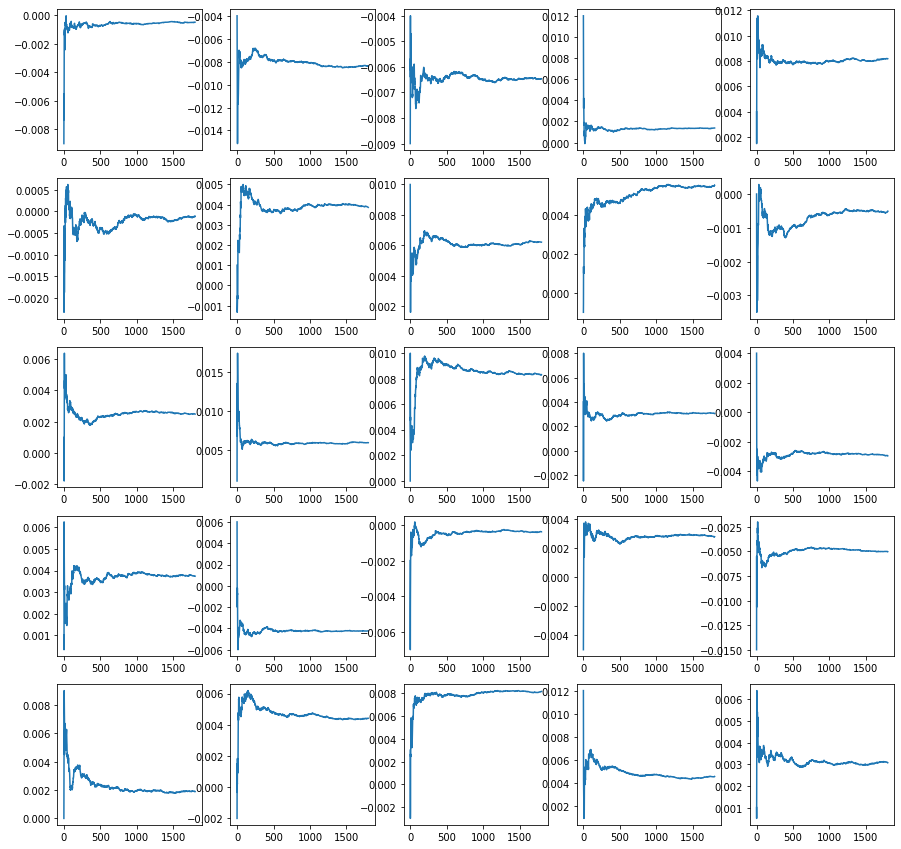

In [23]:
convergence_plots(dshap.marginals_tmc)

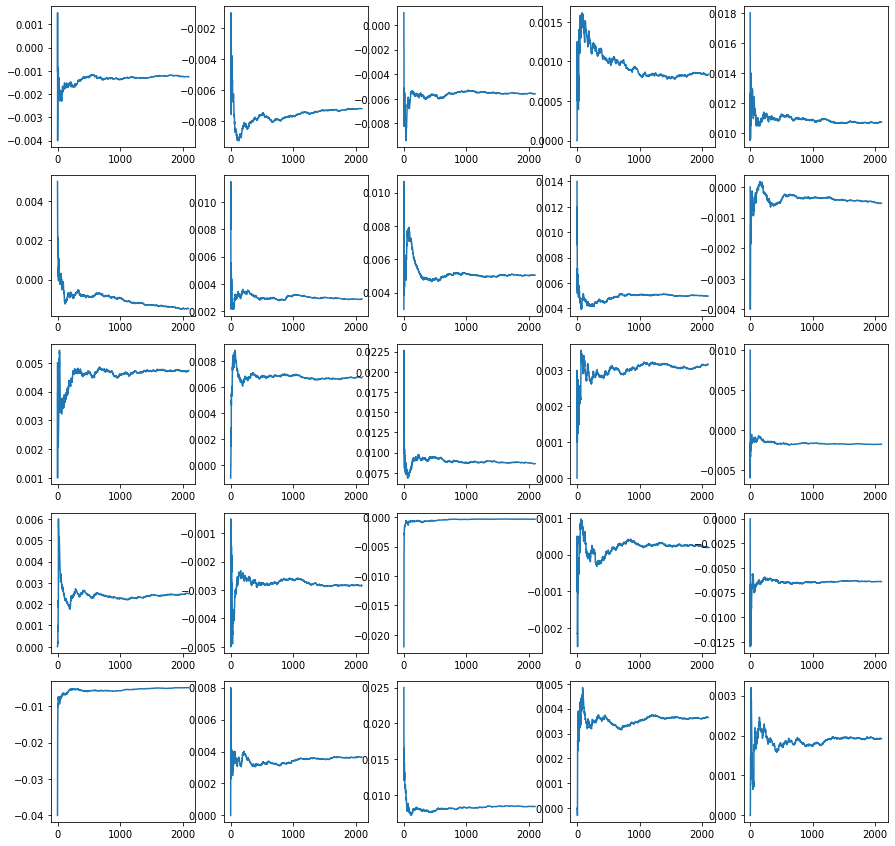

In [24]:
convergence_plots(dshap.marginals_g)

Now let's see the effect of removing high valuen points

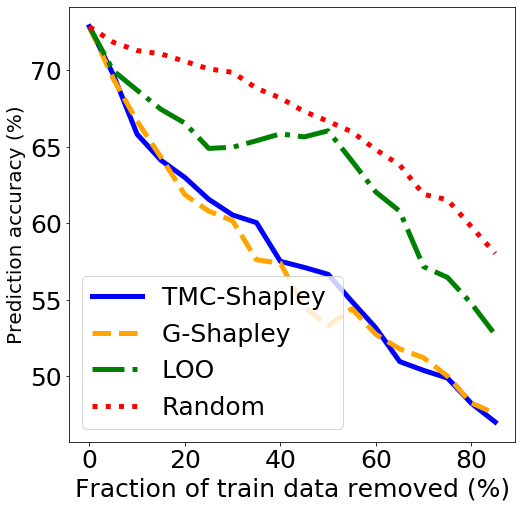

In [26]:
dshap.performance_plots([dshap.vals_tmc, dshap.vals_g, dshap.vals_loo], num_plot_markers=20,
                       sources=dshap.sources)